## Chapter 13

## Uniform priors

## Fisher's scale-dependency objection

In one of his first papers, in 1922, Fisher offered the following criticism of the uniform prior.

He is considering the statistical inference problem where $X\sim \mathrm{Binom}(n,\theta)$, where $n$ is fixed, and we are trying to use observed values of the random variable to ascertain what the $\theta$ is which is generating our data. 

He is worried that the choice of the uniform prior is scale-dependent:

> For we might never have happened to direct our attention to the particular quantity $\theta$: we might equally have measured probability upon an entirely different scale. If, for instance, $\mathrm{sin} \tau = 2\theta-1$, the quantity, $\tau$, measures the degree of probability, just as well as $\theta$, and is even, for some purposes, the more suitable variable ({cite}`Fisher1922-iw` p. 325)




In [292]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import math


def binom_visualizer(n,x):

    # Create a range of theta values
    theta = np.linspace(0, 1, 1000)

    # Calculate the uniform prior
    prior = [1]*len(theta)

    # Calculate the likelihood
    likelihood = binom.pmf(x, n, theta)

    # Calculate the posterior
    posterior = likelihood * prior
    posterior = posterior/np.sum(posterior)

    # Create a figure
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot the prior
    axs[0].plot(theta, prior)
    axs[0].set_title('Uniform Prior on [0,1]')
    axs[0].set_xlabel('θ')
    axs[0].set_ylabel('Density')

    # Plot the likelihood
    axs[1].plot(theta, likelihood)

    axs[1].set_title('Likelihood p(%i|θ)' % x)
    axs[1].set_xlabel('θ')
    axs[1].set_ylim(0,.5)
    axs[1].set_ylabel('Density')

    # Plot the posterior
    axs[2].plot(theta, posterior)
    axs[2].set_title('Posterior p(θ|%i)' % x)
    axs[2].set_xlabel('θ')
    axs[2].set_ylim(0,.02)
    axs[2].set_ylabel('Density')

    fig.suptitle('Uniform prior on [0,1], likelihood X~Binom(%i, θ), observe X=%i and posterior' % (n,x))

    # Show the plots
    plt.tight_layout()
    plt.show()


In [293]:
interact(binom_visualizer,
            n=widgets.IntSlider(min=1, max=1000, step=1, value=20),
            x=widgets.IntSlider(min=0, max=1000, step=1, value=4))

interactive(children=(IntSlider(value=20, description='n', max=1000, min=1), IntSlider(value=4, description='x…

<function __main__.binom_visualizer(n, x)>

In [294]:
def my_fisher(x, n, theta):
    l = len(theta)
    my_list = [0]*l
    for i in range(l):
        my_list[i] = (math.factorial(n)/((2**n)*math.factorial(x)*math.factorial(n-x))) *(1+math.sin(theta[i]))**(x)*(1-math.sin(theta[i]))**(n-x)
    return my_list



In [295]:


def fisher_visualizer(n,x):

    # Create a range of theta values
    tau = np.linspace(-np.pi/2, np.pi/2, 1000)

    # Calculate the likelihood
    likelihood = my_fisher(x, n, tau)

    # Calculate the posterior
    posterior = [z * (1/1000) for z in likelihood] 
    posterior = posterior/np.sum(posterior)

    # Create a figure
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot the prior
    axs[0].plot(tau, prior)
    axs[0].set_title('Uniform Prior on [-π/2,π/2]')
    axs[0].set_xlabel('τ')
    axs[0].set_ylabel('Density')

    # Plot the likelihood
    axs[1].plot(tau, likelihood)
    axs[1].set_title('Likelihood p(%i|τ)' % x)
    axs[1].set_xlabel('τ')
    axs[1].set_ylim(0,.5)
    axs[1].set_ylabel('Density')

    # Plot the posterior
    axs[2].plot(tau, posterior)
    axs[2].set_title('Posterior p(τ|%i)' % x)
    axs[2].set_xlabel('τ')
    axs[2].set_ylim(0,.02)
    axs[2].set_ylabel('Density')

    fig.suptitle('Uniform prior on [-π/2,π/2], likelihood X~Binom(%i, (1+sin τ)/2), observe X=%i and posterior' % (n,x))

    # Show the plots
    plt.tight_layout()
    plt.show()


In [296]:
interact(fisher_visualizer,
            n=widgets.IntSlider(min=1, max=1000, step=1, value=20),
            x=widgets.IntSlider(min=0, max=1000, step=1, value=4))

interactive(children=(IntSlider(value=20, description='n', max=1000, min=1), IntSlider(value=4, description='x…

<function __main__.fisher_visualizer(n, x)>

In [297]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, beta
import math


def binom_visualizer_jeffreys(n,x):

    # Create a range of theta values
    theta = np.linspace(0, 1, 1000)

    # Calculate the uniform prior
    prior = [1]*len(theta)
    prior_jeff = beta.pdf(theta, 0.5, 0.5)
    
    # Calculate the likelihood
    likelihood = binom.pmf(x, n, theta)

    # Calculate the posterior
    posterior = likelihood * prior
    posterior = posterior/np.sum(posterior)

    posterior_jeff = likelihood * prior
    posterior_jeff = posterior_jeff/np.sum(posterior_jeff)


    # Create a figure
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot the prior
    axs[0].plot(theta, prior)
    axs[0].plot(theta, prior_jeff)    
    axs[0].set_title('Uniform Prior and Jeffreys prior on [0,1]')
    axs[0].set_xlabel('θ')
    axs[0].set_ylabel('Density')

    # Plot the likelihood
    axs[1].plot(theta, likelihood)
    axs[1].set_title('Likelihood p(%i|θ)' % x)
    axs[1].set_xlabel('θ')
    axs[1].set_ylim(0,.5)
    axs[1].set_ylabel('Density')

    # Plot the posterior
    axs[2].plot(theta, posterior)
    axs[2].plot(theta, posterior_jeff)    
    axs[2].set_title('Posterior p(θ|%i)' % x)
    axs[2].set_xlabel('θ')
    axs[2].set_ylim(0,.02)
    axs[2].set_ylabel('Density')

    fig.suptitle('Uniform prior on [0,1], likelihood X~Binom(%i, θ), observe X=%i and posterior' % (n,x))

    # Show the plots
    plt.tight_layout()
    plt.show()


In [298]:
interact(binom_visualizer_jeffreys,
            n=widgets.IntSlider(min=1, max=1000, step=1, value=20),
            x=widgets.IntSlider(min=0, max=1000, step=1, value=4))

interactive(children=(IntSlider(value=20, description='n', max=1000, min=1), IntSlider(value=4, description='x…

<function __main__.binom_visualizer_jeffreys(n, x)>

In [299]:


def fisher_visualizer2(n,x):

    # Create a range of theta values
    tau = np.linspace(-np.pi/2, np.pi/2, 1000)

    prior_jeff = []
    for z in tau:
        sin_z_sq = np.sin(z)**2
        if sin_z_sq != 1:
            prior_jeff.append(.5*(n+1)*n*(1/(1-sin_z_sq))-n*(2*np.sin(z)/(1-sin_z_sq)))
        else:
            prior_jeff.append(np.nan)

    # Calculate the likelihood
    likelihood = my_fisher(x, n, tau)

    # Calculate the posterior
    posterior = [z * (1/1000) for z in likelihood] 
    posterior = posterior/np.sum(posterior)

    posterior_jeff = []
    for i in range(len(likelihood)):
        if not np.isinf(prior_jeff[i]) and not np.isnan(prior_jeff[i]):
            posterior_jeff.append(likelihood[i]*prior_jeff[i])
        else:
            posterior_jeff.append(np.nan)
   
    posterior_jeff = posterior_jeff/np.sum(posterior_jeff)    

    # Create a figure
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot the prior
    axs[0].plot(tau, prior)
    axs[0].plot(tau, prior_jeff)    
    axs[0].set_title('Uniform Prior on [-π/2,π/2]')
    axs[0].set_xlabel('τ')
    axs[0].set_xlim(-np.pi/2, np.pi/2)
    axs[0].set_ylabel('Density')

    # Plot the likelihood
    axs[1].plot(tau, likelihood)
    axs[1].set_title('Likelihood p(%i|τ)' % x)
    axs[1].set_xlabel('τ')
    axs[1].set_ylim(0,.5)
    axs[1].set_xlim(-np.pi/2, np.pi/2)    
    axs[1].set_ylabel('Density')

    # Plot the posterior
    axs[2].plot(tau, posterior)
    axs[2].plot(tau, posterior_jeff)
    axs[2].set_title('Posterior p(τ|%i)' % x)
    axs[2].set_xlabel('τ')
    axs[2].set_ylim(0,.02)
    axs[2].set_xlim(-np.pi/2, np.pi/2)    
    axs[2].set_ylabel('Density')

    fig.suptitle('Uniform prior on [-π/2,π/2], likelihood X~Binom(%i, (1+sin τ)/2), observe X=%i and posterior' % (n,x))

    # Show the plots
    plt.tight_layout()
    plt.show()



In [300]:
interact(fisher_visualizer2,
            n=widgets.IntSlider(min=1, max=1000, step=1, value=20),
            x=widgets.IntSlider(min=0, max=1000, step=1, value=4))

interactive(children=(IntSlider(value=20, description='n', max=1000, min=1), IntSlider(value=4, description='x…

<function __main__.fisher_visualizer2(n, x)>

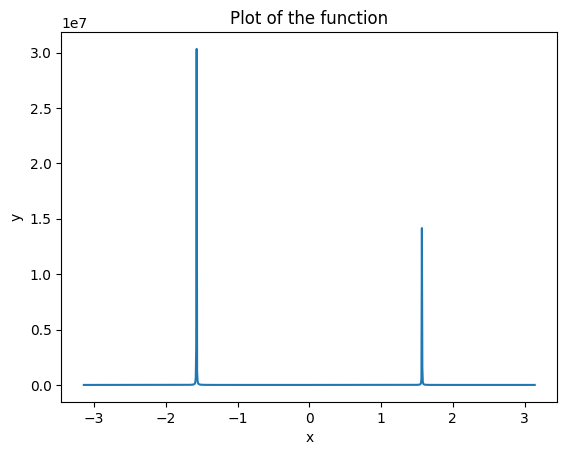

In [301]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of x values
x = np.linspace(-np.pi, np.pi, 1000)

# Calculate the y values for the function
n = 10  # or any other value you want to use for n
y = .5*(n+1)*n*(1/(1-np.sin(x)**2))-n*(2*np.sin(x)/(1-np.sin(x)**2))

# Plot the function
plt.plot(x, y)
plt.title('Plot of the function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Jeffreys

> how can we assign the prior probability when we know nothing about the value of the parameter? The answer is really clear enough when it is recognized that a probability is merely a number associated with a degree  of reasonable confidence and has no purpose except to give it formal expression. If we have no information relevant to the actual value of a parameter, the probability must be chosen so as to express the fact that we have none ({cite}`Jeffreys1948-vt`).

In [302]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import metakernel
import ipywidgets as widgets    
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider
import seaborn as sns
pastel_colors = sns.color_palette("pastel")
from scipy.stats import nbinom, binom
from scipy.special import comb
 

In [303]:
import numpy as np
import matplotlib.pyplot as plt

def uniform_pdf_cdf(n):
    # Create a range of x values
    x = np.arange(0, n)

    # Calculate the PDF
    y = [1/n]*len(x)

    # Calculate the CDF
    z = np.cumsum(y) / np.sum(y)

    # Create a figure
    plt.figure(figsize=(12, 6))

    # Plot the PDF
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot number 1
    plt.plot(x, y)
    plt.xlim(0, n)
    plt.ylim(0, 1)
    plt.title('pdf of Uniform Distribution on {} Elements'.format(n))

    # Plot the CDF
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot number 2
    plt.plot(x, z)
    plt.title('cdf of Uniform Distribution on {} Elements'.format(n))

    # Show the plots
    plt.show()

# Call the function

In [304]:
interact(uniform_pdf_cdf, 
            n=IntSlider(min=1, max=100, step=1, value=3))

interactive(children=(IntSlider(value=3, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

<function __main__.uniform_pdf_cdf(n)>

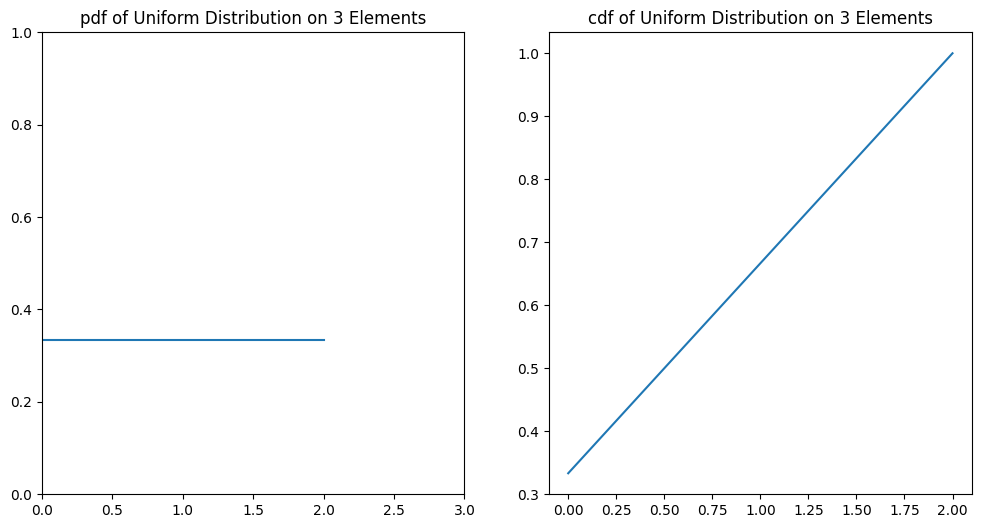

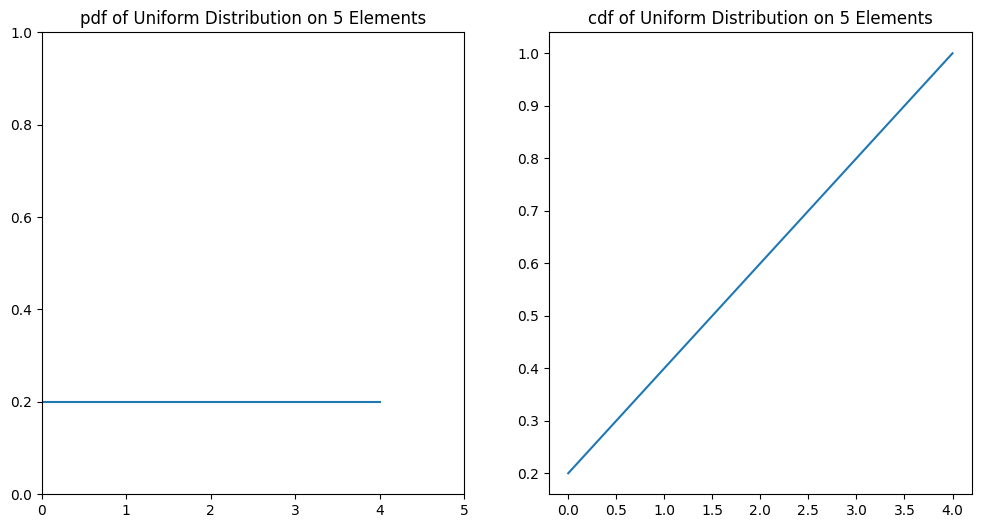

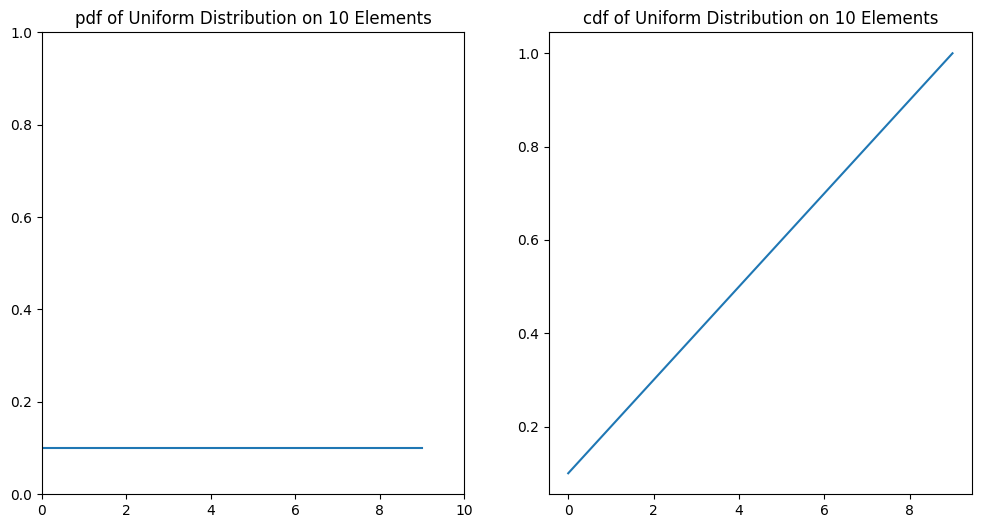

In [305]:
uniform_pdf_cdf(3)
uniform_pdf_cdf(5)
uniform_pdf_cdf(10)